#  Data Preparation (Pre-processing) & Exploratory Analysis_Temperature_Readings
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*This data analysis demonstration is based on a dataset comprising 'In-Out' temperature measurements from IOT devices (location: India). This work has been initially focused on data preparation/manipulation of the imported dataset features to apply all necessary data preprocessing/cleaning methods by use of numpy and pandas (i.e. dropping/adding columns to the dataframe,column rename,'Date' feature conversion to datetime object and use as index, feature engineering to extract datetime categories, detection & dropping of duplicate records, applying the map function and use of interpolation(linear,polynomial to fill missing temperature entries).*

*In addition, an exploratory data analysis is presented so as to extract useful information from the 'temperature' feature with the help of data visualization techniques (i.e. pie & bar charts, count/distribution/box/scatter plots). The scope of the EDA is to uncover meaningful insights related to key 'temperature' dataset column characteristics such as a) the amount of 'temperature' observations per class ('In-Out' temp entries--> balanced/unbalanced dataset), b) the 'temperature' density estimation, c) 'temperature' time series distribution and d) 'In/Out temperature' min/max/mean/median values when grouped at different time periods (hours,days,months).* 




**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*Temperature Readings : IOT Devices*" -- File: "IOT-temp.csv" -- Source:https://www.kaggle.com/atulanandjha/temperature-readings-iot-devices



In [63]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Importing the dataset
dataset=pd.read_csv('IOT-temp.csv')

In [65]:
# Dataset Information regarding a) the data type of each feature and b) total values per feature. Dataset comprises
# four 'object' and one 'int' dtype column

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
id            97606 non-null object
room_id/id    97606 non-null object
noted_date    97606 non-null object
temp          97606 non-null int64
out/in        97606 non-null object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [66]:
# Dataset preview (first 5 entries)
dataset.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [67]:
# The 'id' column is dropped
dataset=dataset.drop('id',axis=1)

In [68]:
# Column 'room_id/id' is renamed to 'Room_Id'
dataset.rename(columns={'room_id/id':'Room_Id'},inplace=True)
dataset['Room_Id'].unique()

array(['Room Admin'], dtype=object)

In [69]:
# 'Room_Id' has only one unique value ('Room Admin'), thus it is dropped as well

dataset=dataset.drop('Room_Id',axis=1)

In [70]:
# Column 'noted_date' is renamed to 'Date' and converted from 'object' type into 'datetime' type
dataset.rename(columns={'noted_date':'Date'},inplace=True)
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset.dtypes

Date      datetime64[ns]
temp               int64
out/in            object
dtype: object

In [71]:
# As it can be observed, there is presence of duplicate entries in the dataset (i.e. indexes [0-1] & [1,2])
dataset.head()

,Date,temp,out/in
0,2018-08-12 09:30:00,29,In
1,2018-08-12 09:30:00,29,In
2,2018-08-12 09:29:00,41,Out
3,2018-08-12 09:29:00,41,Out
4,2018-08-12 09:29:00,31,In


In [72]:
# Detection of duplicate rows - first 10 entries
duplicate_rows = dataset.duplicated()
duplicate_rows[:10]

0    False
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
dtype: bool

In [73]:
# Dataset total entries
print(dataset.shape[0])
# Dataset total duplicate records
print(dataset.duplicated().sum())

97606
60338


In [74]:
# Duplicate rows are dropped
dataset.drop_duplicates(subset = ['Date','temp','out/in'],inplace = True)
dataset.head()

,Date,temp,out/in
0,2018-08-12 09:30:00,29,In
2,2018-08-12 09:29:00,41,Out
4,2018-08-12 09:29:00,31,In
6,2018-08-12 09:28:00,29,In
8,2018-08-12 09:26:00,29,In


In [75]:
# Index is reset
dataset=dataset.reset_index()
dataset=dataset.drop('index',axis=1)
dataset.head()

,Date,temp,out/in
0,2018-08-12 09:30:00,29,In
1,2018-08-12 09:29:00,41,Out
2,2018-08-12 09:29:00,31,In
3,2018-08-12 09:28:00,29,In
4,2018-08-12 09:26:00,29,In


In [76]:
# New dataset shape
dataset.shape

(37268, 3)

In [77]:
# Feature Engineering is applied to extract the 'Days of Week' and 'Month' from the 'Date' column
dataset['Week_Day']=dataset['Date'].apply(lambda date: date.dayofweek)
dataset['Month']=dataset['Date'].apply(lambda date: date.month)


In [78]:
# Sorted unique values of the 'Week_Day' column
sorted(dataset['Week_Day'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [79]:
# Mapping to rename the entries of the 'Week_Day' column
dataset['Week_Day'] = dataset['Week_Day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',
                                  5:'Sat',6:'Sun'})
dataset.head(2)

,Date,temp,out/in,Week_Day,Month
0,2018-08-12 09:30:00,29,In,Sun,8
1,2018-08-12 09:29:00,41,Out,Sun,8


In [80]:
# Sorted unique values of the 'Month' column
sorted(dataset['Month'].unique())


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [81]:
# Mapping to rename the entries of the 'Month' column
dataset['Month'] = dataset['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
                                  6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
dataset.head(2)

,Date,temp,out/in,Week_Day,Month
0,2018-08-12 09:30:00,29,In,Sun,Aug
1,2018-08-12 09:29:00,41,Out,Sun,Aug


In [82]:
# Count of 'Out' & 'In' temperature records
dataset['out/in'].value_counts()

Out    27326
In      9942
Name: out/in, dtype: int64

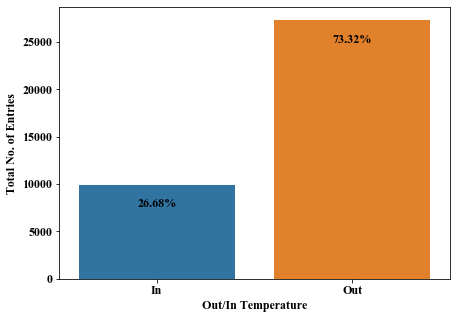

In [83]:
# As it can be observed, the Out/In temperature column is unbalanced with respect to its entries
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size']=12

total_entries=dataset.shape[0]
plt.figure(figsize=(7,5))
count_temp=sns.countplot('out/in',data=dataset)
plt.xlabel('Out/In Temperature',fontweight='bold')
plt.ylabel('Total No. of Entries',fontweight='bold')
for p in count_temp.patches:
    count_temp.annotate('{:.2f}%'.format(100*p.get_height()/total_entries), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')


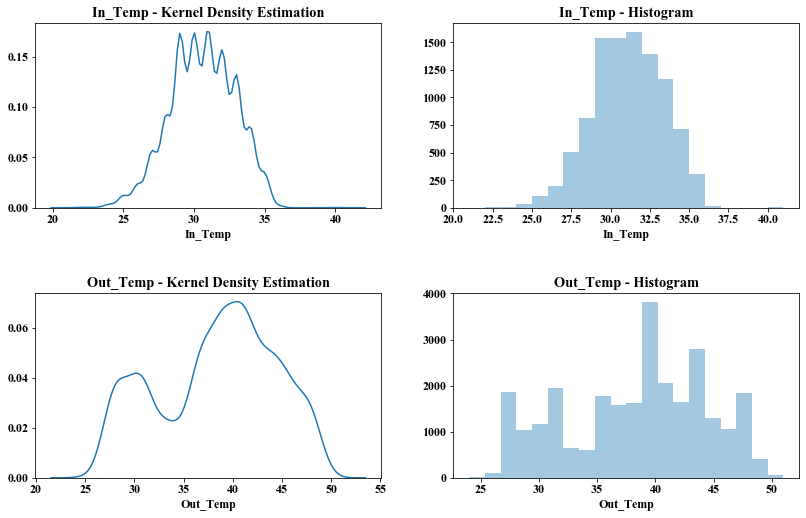

In [84]:
# In/Out Temperature kernel density estimation and histogram plots

fig,axs=plt.subplots(2,2,figsize=(12,8))
sns.distplot(dataset['temp'][dataset['out/in']=='In'],hist=False,ax=axs[0,0])
axs[0,0].set_title('In_Temp - Kernel Density Estimation',fontweight='bold')
axs[0,0].set_xlabel('In_Temp',fontweight='bold')

sns.distplot(dataset['temp'][dataset['out/in']=='In'],kde=False,bins=20,ax=axs[0,1])
axs[0,1].set_title('In_Temp - Histogram',fontweight='bold')
axs[0,1].set_xlabel('In_Temp',fontweight='bold')

sns.distplot(dataset['temp'][dataset['out/in']=='Out'],hist=False,ax=axs[1,0])
axs[1,0].set_title('Out_Temp - Kernel Density Estimation',fontweight='bold')
axs[1,0].set_xlabel('Out_Temp',fontweight='bold')

sns.distplot(dataset['temp'][dataset['out/in']=='Out'],kde=False,bins=20,ax=axs[1,1])
axs[1,1].set_title('Out_Temp - Histogram',fontweight='bold')
axs[1,1].set_xlabel('Out_Temp',fontweight='bold')

for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

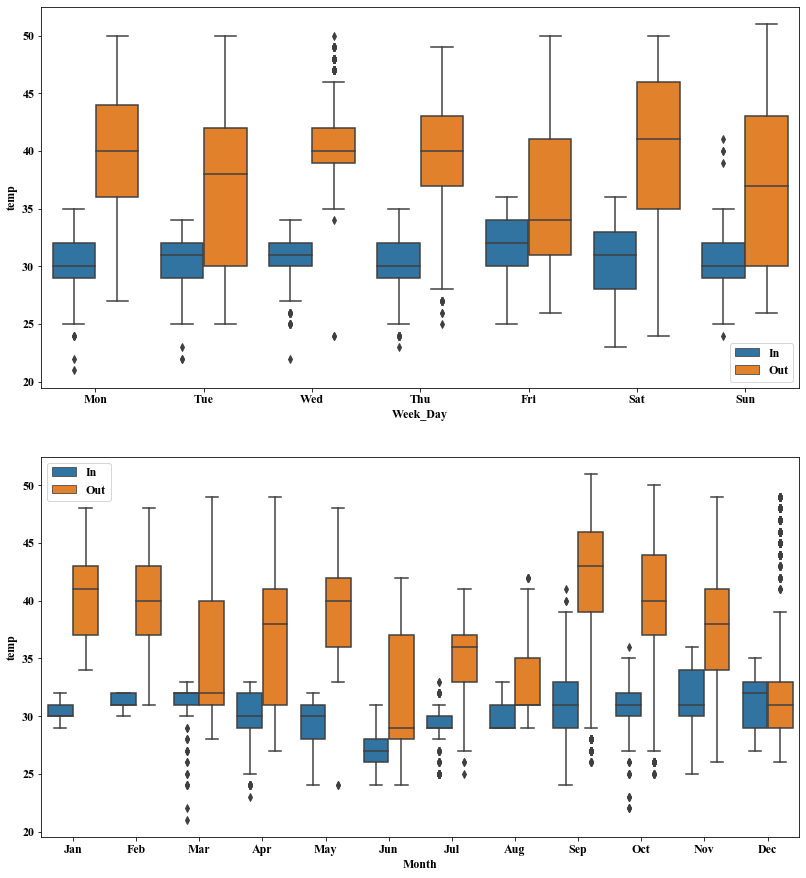

In [85]:
# Boxplots of In and Out temperatures grouped by the 'Day of Week' and 'Month' features
fig,axs=plt.subplots(2,1,figsize=(12,13))
count_entries=sns.boxplot(x='Week_Day',y='temp',data=dataset,hue='out/in',
                          order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ax=axs[0])
sns.boxplot(x='Month',y='temp',data=dataset,hue='out/in',order=['Jan','Feb','Mar','Apr','May',
                                  'Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ax=axs[1])

for ax in axs.flat:
    ax.legend(loc='best')
    ax.figure.tight_layout(pad=3);

In [86]:
# Creating a new pd dataframe of Max and Min Temp measurements (index=Month)
df1 = dataset.loc[dataset.groupby('Month').temp.idxmax()]
df2 = dataset.loc[dataset.groupby('Month').temp.idxmin()]
maxmin=df1[['Month','temp']]
maxmin=maxmin.set_index('Month')
maxmin.rename(columns={'temp':'Max Temp'},inplace=True)
maxmin['Min Temp']=df2[['temp']].values
maxmin.head()

,Max Temp,Min Temp
Month,,
Apr,49,23
Aug,42,29
Dec,49,26
Feb,48,30
Jan,48,29


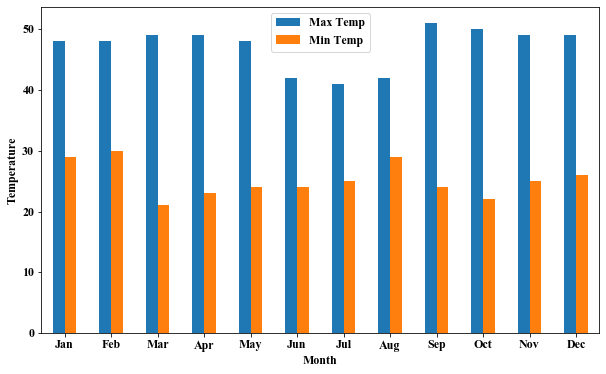

In [87]:
# Max - Min Temperature Measurement grouped by Month
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax = maxmin.set_index(maxmin.index).loc[month_order].plot(kind="bar",figsize=(10,6), legend=True)
ax.set_ylabel('Temperature',fontweight='bold')
ax.set_xlabel('Month',fontweight='bold')
plt.xticks(rotation=0);

In [88]:
# Function to group the months into 4 quarters
def month_per(val):
    if val in ['Dec','Jan','Feb']:
        m_period = 'Dec-Feb'
    elif val in ['Mar','Apr','May']:
        m_period = 'Mar-May'
    elif val in ['Jun','Jul','Aug']:
        m_period = 'Jun-Aug'
    elif val in ['Sep','Oct','Nov']:
        m_period = 'Sep-Nov'
    return m_period
# Creating a new dataset column by applying the' month_per' function on 'Month' column
dataset['3_Month_Period'] = dataset['Month'].apply(month_per)

In [89]:
# Total number of entries for each sub-group of the feature
dataset['3_Month_Period'].value_counts()

Sep-Nov    26261
Mar-May     4318
Dec-Feb     3621
Jun-Aug     3068
Name: 3_Month_Period, dtype: int64

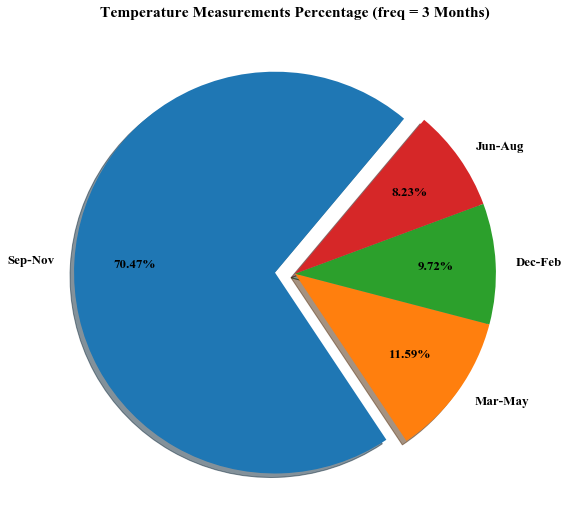

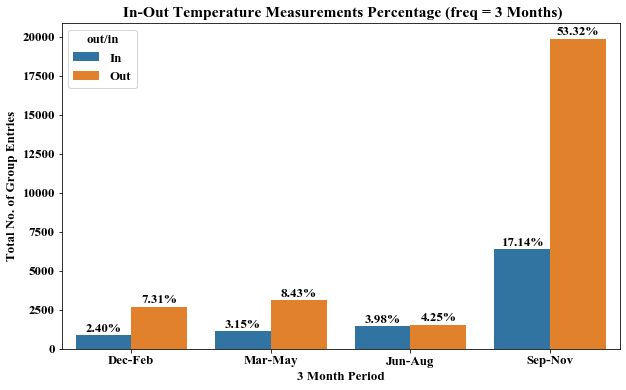

In [90]:
# Pie chart presenting the percentage of each 3-Month group with respect to the total number of column entries
fig, ax = plt.subplots(1,figsize=(9,11))

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman, serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=13
labels =dataset['3_Month_Period'].value_counts().index
count = dataset['3_Month_Period'].value_counts().values
explode = (0.1,0,0,0)
ax.pie(count,explode=explode,labels=labels,pctdistance=0.7,
       autopct='%1.2f%%', labeldistance=1.1,shadow=True, startangle=50);
ax.set_title("Temperature Measurements Percentage (freq = 3 Months)")
# Count plot presenting the percentage of each 3-month In-Out Temp subgroup with respect to the total number of column entries
plt.figure(figsize=(10,6))
total_entries=len(dataset)
count_entries=sns.countplot('3_Month_Period',data=dataset,hue='out/in',order=['Dec-Feb','Mar-May','Jun-Aug','Sep-Nov'])
plt.xlabel('3 Month Period',fontweight='bold')
plt.ylabel('Total No. of Group Entries',fontweight='bold')
plt.title(' In-Out Temperature Measurements Percentage (freq = 3 Months)')
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total_entries), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')


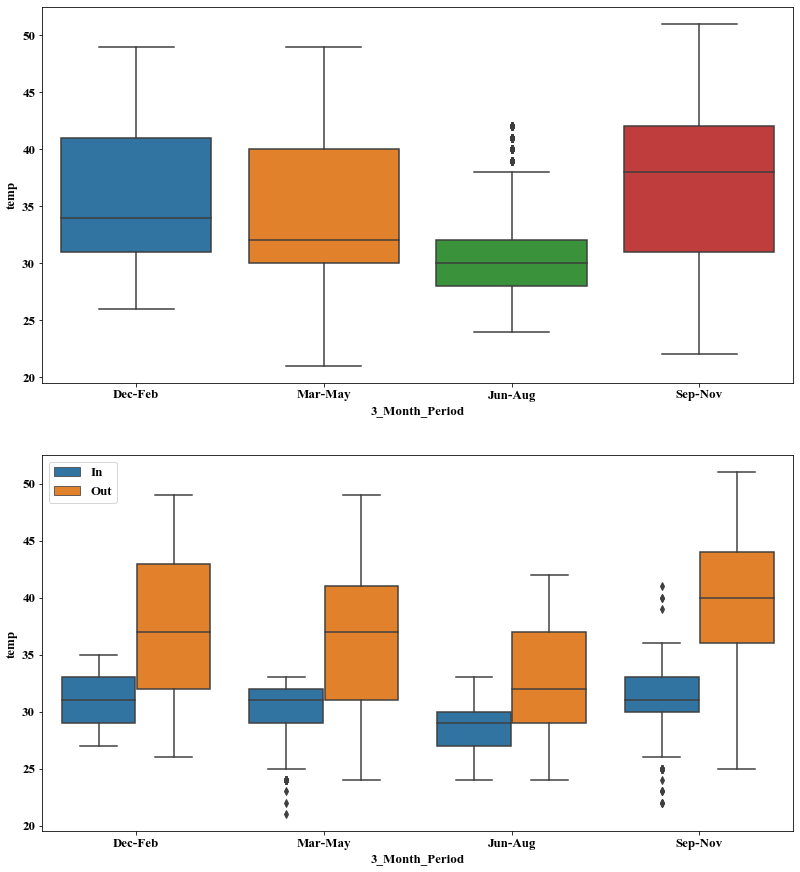

In [91]:
# # Boxplots of i) temperature (combined In & Out entries) and ii) In/Out temperatures grouped by the '3_Month_Period' column
fig,axs=plt.subplots(2,1,figsize=(12,13))

sns.boxplot(x='3_Month_Period',y='temp',data=dataset,order=['Dec-Feb','Mar-May','Jun-Aug','Sep-Nov'],ax=axs[0])

sns.boxplot(x='3_Month_Period',y='temp',data=dataset,hue='out/in',order=['Dec-Feb','Mar-May','Jun-Aug','Sep-Nov'],ax=axs[1])
axs[1].legend(loc='best')
for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

In [92]:
# Creating a new column by extracting the time() from the 'Date' datetime feature
dataset['Time']=dataset['Date'].apply(lambda date:date.time())


In [93]:
# Setting the 'Date' column as index
dataset=dataset.set_index('Date')
dataset.head()

,temp,out/in,Week_Day,Month,3_Month_Period,Time
Date,,,,,,
2018-08-12 09:30:00,29,In,Sun,Aug,Jun-Aug,09:30:00
2018-08-12 09:29:00,41,Out,Sun,Aug,Jun-Aug,09:29:00
2018-08-12 09:29:00,31,In,Sun,Aug,Jun-Aug,09:29:00
2018-08-12 09:28:00,29,In,Sun,Aug,Jun-Aug,09:28:00
2018-08-12 09:26:00,29,In,Sun,Aug,Jun-Aug,09:26:00


In [94]:
# Creating time period groups  ('3 hour interval' )
time_period1=dataset['Time'].between_time('06:00:00', '08:59:00')
time_period2=dataset['Time'].between_time('09:00:00', '11:59:00')
time_period3=dataset['Time'].between_time('12:00:00', '14:59:00')
time_period4=dataset['Time'].between_time('15:00:00', '17:59:00')
time_period5=dataset['Time'].between_time('18:00:00', '20:59:00')
time_period6=dataset['Time'].between_time('21:00:00', '23:59:00')
time_period7=dataset['Time'].between_time('00:00:00', '02:59:00')
time_period8=dataset['Time'].between_time('03:00:00', '05:59:00')

In [95]:
# Function to group the temperature measurement time into 8 groups
def time_per(val):
    if val in time_period1:
        time_period = '6-9 a.m.'
    elif val in time_period2:
        time_period = '9 a.m-12 p.m.'
    elif val in time_period3:
        time_period = '12-15 p.m.'
    elif val in time_period4:
        time_period = '15-18 p.m.'
    elif val in time_period5:
        time_period = '18-21 p.m.'
    elif val in time_period6:
        time_period = '21 p.m-0 a.m.'
    elif val in time_period7:
        time_period = '0-3 a.m.'
    elif val in time_period8:
        time_period = '3-6 a.m.'
    return time_period

# Creating a new dataset column by applying the' time_per' function on 'Time' column
dataset['Time_Period'] = dataset['Time'].apply(time_per)

In [96]:
# Total number of entries for each sub-group of the 'Time_Period' feature
dataset['Time_Period'].value_counts()

9 a.m-12 p.m.    5069
12-15 p.m.       5017
15-18 p.m.       4883
3-6 a.m.         4736
18-21 p.m.       4709
6-9 a.m.         4533
0-3 a.m.         4220
21 p.m-0 a.m.    4101
Name: Time_Period, dtype: int64

In [97]:
df_time = dataset.groupby('Time_Period').agg({'temp': ['max','mean','median','min']})
df_time=df_time.round(2)
df_time

temp                  
               max   mean median min
Time_Period                         
0-3 a.m.        49  35.96     36  25
12-15 p.m.      50  36.09     33  24
15-18 p.m.      51  36.31     38  22
18-21 p.m.      50  36.37     37  25
21 p.m-0 a.m.   50  36.67     37  25
3-6 a.m.        50  36.29     37  24
6-9 a.m.        50  37.09     34  22
9 a.m-12 p.m.   50  35.78     33  21

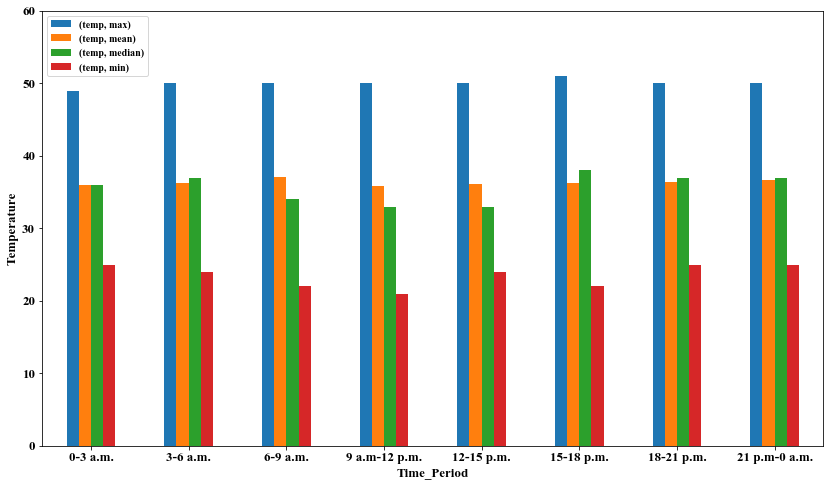

In [98]:
# Max - Min Temperature Measurement grouped by 'Time_Period' feature
time_order = ['0-3 a.m.','3-6 a.m.','6-9 a.m.','9 a.m-12 p.m.','12-15 p.m.','15-18 p.m.','18-21 p.m.',
                                                                           '21 p.m-0 a.m.']
ax = df_time.set_index(df_time.index).loc[time_order].plot(kind="bar",figsize=(14,8))
ax.set_ylabel('Temperature',fontweight='bold')
ax.set_xlabel('Time_Period',fontweight='bold')
plt.legend(loc='upper left',fontsize=10)
plt.ylim(0,60)
plt.xticks(rotation=0);

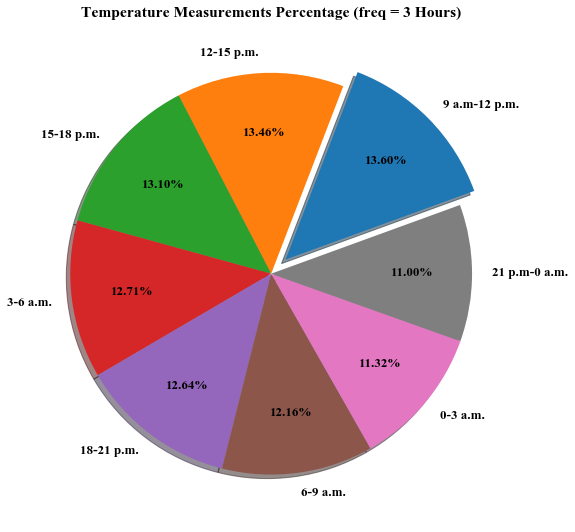

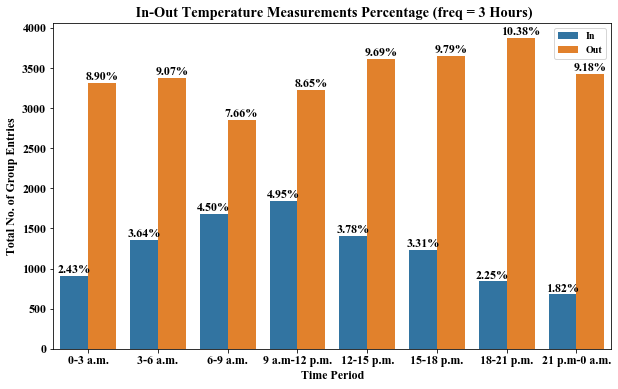

In [99]:
# Pie chart presenting the percentage of each 3-Hour Interval group with respect to the total number of temperature entries
fig, ax = plt.subplots(1,figsize=(9,11))

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman, serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=13
labels =dataset['Time_Period'].value_counts().index
count = dataset['Time_Period'].value_counts().values
explode = (0.1,0,0,0,0,0,0,0)
ax.pie(count,explode=explode,labels=labels,pctdistance=0.7,
       autopct='%1.2f%%', labeldistance=1.1,shadow=True, startangle=20);
ax.set_title("Temperature Measurements Percentage (freq = 3 Hours)")
# Countplot presenting the percentage of each 3-Hour In-Out Temp subgroup with respect to the total No. of temperature entries
plt.figure(figsize=(10,6))
plt.rcParams['font.size']=12
total_entries=len(dataset)
count_entries=sns.countplot('Time_Period',data=dataset,hue='out/in',order=['0-3 a.m.','3-6 a.m.','6-9 a.m.','9 a.m-12 p.m.',
                                                                          '12-15 p.m.','15-18 p.m.','18-21 p.m.',
                                                                           '21 p.m-0 a.m.'])
plt.xlabel('Time Period',fontweight='bold')
plt.ylabel('Total No. of Group Entries',fontweight='bold')
plt.title(' In-Out Temperature Measurements Percentage (freq = 3 Hours)')
plt.legend(loc='best',fontsize=10)
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total_entries), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')


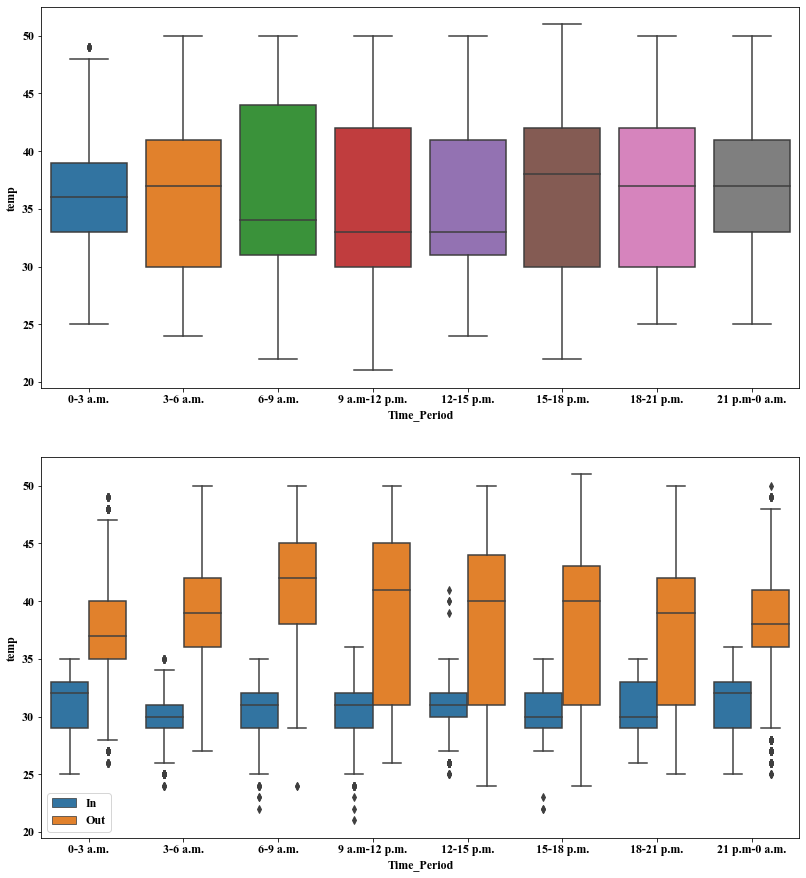

In [100]:
# # Boxplots of i) temperature (combined In & Out entries) and ii) In/Out temperatures grouped by the 'Time_Period' column
fig,axs=plt.subplots(2,1,figsize=(12,13))
plt.rcParams['font.size']=12
sns.boxplot(x='Time_Period',y='temp',data=dataset,order=['0-3 a.m.','3-6 a.m.','6-9 a.m.','9 a.m-12 p.m.',
                                                                          '12-15 p.m.','15-18 p.m.','18-21 p.m.',
                                                                           '21 p.m-0 a.m.'],ax=axs[0])

sns.boxplot(x='Time_Period',y='temp',data=dataset,hue='out/in',order=['0-3 a.m.','3-6 a.m.','6-9 a.m.','9 a.m-12 p.m.',
                                                                          '12-15 p.m.','15-18 p.m.','18-21 p.m.',
                                                                           '21 p.m-0 a.m.'],ax=axs[1])
axs[1].legend(loc='best')
for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);

In [101]:
# Resampling the dataset so as to convert it into Daily Mean Temperature measurements
# As it can be observed, there is presence of 'NaN' entries
df_day=dataset.resample('D').mean()
df_day.head(5)

,temp
Date,
2018-01-11,40.660870
2018-01-12,37.379501
2018-01-13,NaN
2018-01-14,NaN
2018-01-15,NaN


In [102]:
# Resampled df_day dataset shape
df_day.shape

(334, 1)

In [103]:
# There is use of the interpolate function(linear method) to fill the missing entries of the df_day dataset

df_day=df_day.interpolate(method='linear')
df_day.head()

,temp
Date,
2018-01-11,40.660870
2018-01-12,37.379501
2018-01-13,37.198779
2018-01-14,37.018057
2018-01-15,36.837335


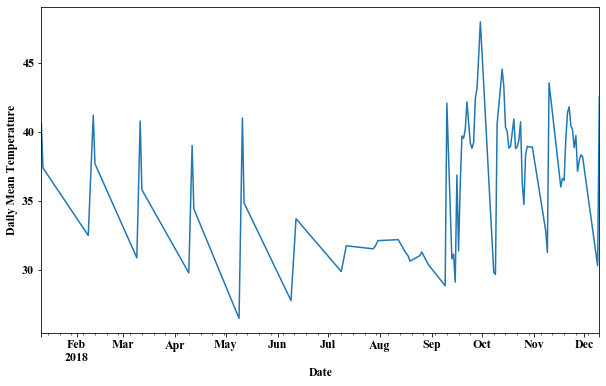

In [104]:
# Daily mean temperature plot
plt.figure(figsize=(10,6))
df_day['temp'].plot()
plt.xlabel('Date')
plt.ylabel('Daily Mean Temperature');

In [105]:
# Resampling the dataset so as to convert it into Weekly Mean Temperature measurements
# As it can be observed, there is presence of 'NaN' entries
df_week=dataset.resample('W').mean()
df_week.head(5)

,temp
Date,
2018-01-14,39.218027
2018-01-21,NaN
2018-01-28,NaN
2018-02-04,NaN
2018-02-11,41.072261


In [106]:
# Resampled df_week dataset shape
df_week.shape

(49, 1)

In [107]:
# There is use of the interpolate function(linear and polynomial(order=3,5,7) methods) to fill the missing entries of the 
# df_week dataset
df_week_lin=df_week.interpolate(method='linear')
df_week_pol3=df_week.interpolate(method='polynomial',order=3)
df_week_pol5=df_week.interpolate(method='polynomial',order=5)
df_week_pol7=df_week.interpolate(method='polynomial',order=7)

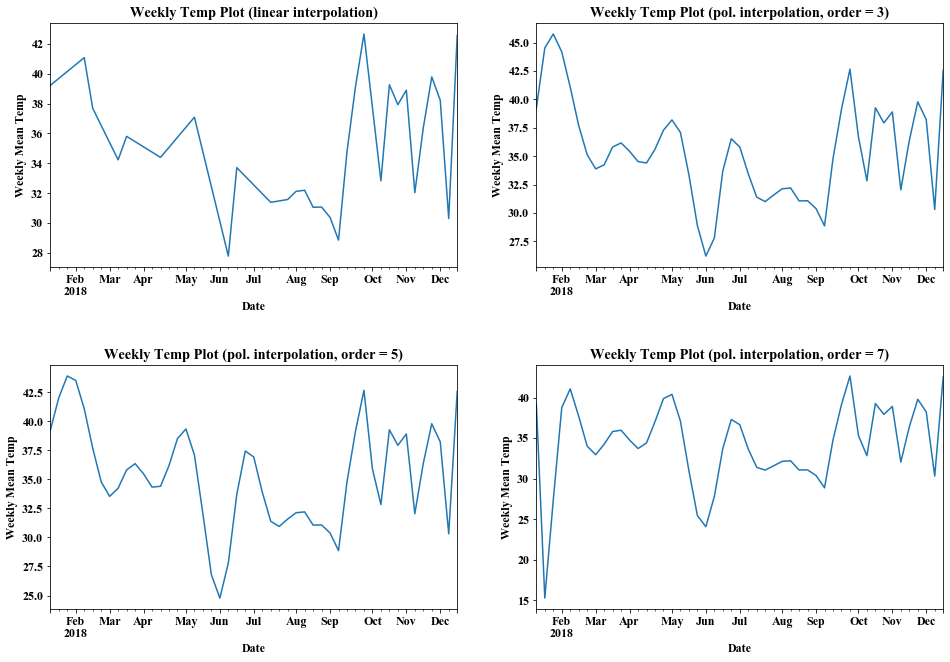

In [108]:
# Weekly mean temperature plots
fig,axs=plt.subplots(2,2,figsize=(14,10))


df_week_lin['temp'].plot(ax=axs[0,0])
axs[0,0].set_title('Weekly Temp Plot (linear interpolation)')

df_week_pol3['temp'].plot(ax=axs[0,1])
axs[0,1].set_title('Weekly Temp Plot (pol. interpolation, order = 3)')

df_week_pol5['temp'].plot(ax=axs[1,0])
axs[1,0].set_title('Weekly Temp Plot (pol. interpolation, order = 5)')

df_week_pol7['temp'].plot(ax=axs[1,1])
axs[1,1].set_title('Weekly Temp Plot (pol. interpolation, order = 7)')


for ax in axs.flat:
    ax.set_xlabel('Date',fontweight='bold')
    ax.set_ylabel('Weekly Mean Temp',fontweight='bold')
    ax.figure.tight_layout(pad=3);

In [109]:
# Resampling the dataset so as to convert it into Monthly Mean Temperature measurements
# As it can be observed, there is no presence of 'NaN' entries
df_month=dataset.resample('M').mean()
df_month

,temp
Date,
2018-01-31,39.218027
2018-02-28,39.428058
2018-03-31,34.610397
2018-04-30,34.397797
2018-05-31,37.085575
2018-06-30,30.198255
2018-07-31,31.415911
2018-08-31,31.556511
2018-09-30,38.117332


In [110]:
# Resampled df_month dataset shape
df_month.shape

(12, 1)

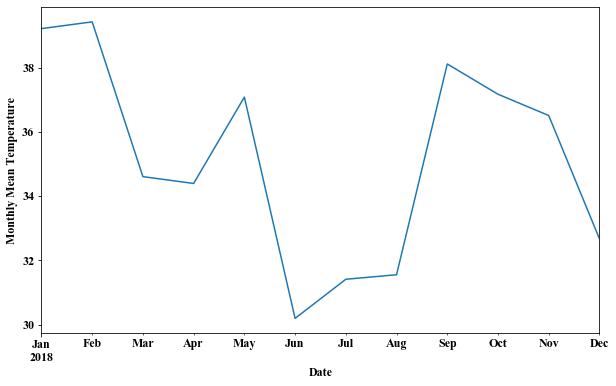

In [111]:
# Monthly mean temperature plot
plt.figure(figsize=(10,6))
df_month['temp'].plot()
plt.xlabel('Date')
plt.ylabel('Monthly Mean Temperature');